In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import os


In [2]:
import joblib
import pandas as pd

data_kcat = joblib.load('/Users/pinchichen/2025S lab/AI drug project/Catpred/dataset/km/km_with_features.joblib')
data_kcat.head()

,Sequence,sequence_source,uniprot,Smiles,value,ec,taxonomy_id,log10_value,log10km_mean,metabolite_features,protein_features
0,MGQEKLYIEKELSWLSFNERVLQEAADKSNPLIERMRFLGIYSNNL...,sabio,P0A7B1,Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)O)C(O)C2O)...,0.6300,2.7.4.1,562,-0.200659,-0.200659,"[0.25370342, -0.3417107, -0.28024313, -0.04292...","[-0.06592023, -0.062496405, -0.012068139, 0.06..."
1,MSQQPHTEQFPKNQPPLAERLASARQLVTKAISAVPPHPEPLPSPN...,brenda,A0A0S2SWE4,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)O,0.0264,1.13.11.60,474922,-1.578396,-1.553572,"[0.61067283, 0.46248585, -0.051634412, -0.7397...","[0.16962084, -0.09671225, 0.116663285, 0.05065..."
2,MSAAADRLNLTSGHLNAGRKRSSSSVSLKAVEKPFKVTVIGSGNWG...,uniprot_search,A0A060KZ16,O=C(CO)COP(=O)(O)O,0.6100,1.1.1.8,114524,-0.214670,-0.214670,"[0.29938427, -0.0972216, -0.3334697, -0.721026...","[0.0933136, -0.117130496, 0.0676241, 0.0187789..."
3,MLAEKTRSIIKATVPVLEQQGTVITRTFYKNMLTEHTELLNIFNRT...,sabio,P39676,NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4c...,0.0280,1.14.12.17,4932,-1.552842,-1.552842,"[0.639636, -0.14536878, -0.52627945, 0.1240742...","[-0.02827879, -0.04372119, 0.03182794, 0.19197..."
4,MASAERVPVSFNKPGRVPFGEVQGYAPGHIPAYSNKHDHFFSGERS...,uniprot_search,O60993,Nc1ncnc2c1ncn2[C@H]1O[C@H](COP(=O)([O-])OP(=O)...,0.4000,6.3.1.9,5656,-0.397940,-0.397940,"[0.25855744, 0.43888408, -0.7136499, 0.0234168...","[0.074476704, -0.050253637, 0.05497695, 0.1402..."


In [3]:
data_kcat.rename(columns={'log10km_mean':'label'},inplace=True)
data_kcat.head()

,Sequence,sequence_source,uniprot,Smiles,value,ec,taxonomy_id,log10_value,label,metabolite_features,protein_features
0,MGQEKLYIEKELSWLSFNERVLQEAADKSNPLIERMRFLGIYSNNL...,sabio,P0A7B1,Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)O)C(O)C2O)...,0.6300,2.7.4.1,562,-0.200659,-0.200659,"[0.25370342, -0.3417107, -0.28024313, -0.04292...","[-0.06592023, -0.062496405, -0.012068139, 0.06..."
1,MSQQPHTEQFPKNQPPLAERLASARQLVTKAISAVPPHPEPLPSPN...,brenda,A0A0S2SWE4,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)O,0.0264,1.13.11.60,474922,-1.578396,-1.553572,"[0.61067283, 0.46248585, -0.051634412, -0.7397...","[0.16962084, -0.09671225, 0.116663285, 0.05065..."
2,MSAAADRLNLTSGHLNAGRKRSSSSVSLKAVEKPFKVTVIGSGNWG...,uniprot_search,A0A060KZ16,O=C(CO)COP(=O)(O)O,0.6100,1.1.1.8,114524,-0.214670,-0.214670,"[0.29938427, -0.0972216, -0.3334697, -0.721026...","[0.0933136, -0.117130496, 0.0676241, 0.0187789..."
3,MLAEKTRSIIKATVPVLEQQGTVITRTFYKNMLTEHTELLNIFNRT...,sabio,P39676,NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4c...,0.0280,1.14.12.17,4932,-1.552842,-1.552842,"[0.639636, -0.14536878, -0.52627945, 0.1240742...","[-0.02827879, -0.04372119, 0.03182794, 0.19197..."
4,MASAERVPVSFNKPGRVPFGEVQGYAPGHIPAYSNKHDHFFSGERS...,uniprot_search,O60993,Nc1ncnc2c1ncn2[C@H]1O[C@H](COP(=O)([O-])OP(=O)...,0.4000,6.3.1.9,5656,-0.397940,-0.397940,"[0.25855744, 0.43888408, -0.7136499, 0.0234168...","[0.074476704, -0.050253637, 0.05497695, 0.1402..."


In [4]:
# Define dataset
class MPI_Dataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        return {
            'metabolite_features': torch.tensor(np.asarray(row['metabolite_features'], dtype=np.float32)),
            'protein_features': torch.tensor(np.asarray(row['protein_features'], dtype=np.float32)),
            'label': torch.tensor(float(row['label']), dtype=torch.float32),
        }

In [5]:
# Load data
# Assuming `combined_df` is a pandas DataFrame containing all necessary columns
train_df, temp_df = train_test_split(data_kcat, test_size=0.3, shuffle=True, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, shuffle=True, random_state=42)

train_dataset = MPI_Dataset(train_df)
val_dataset = MPI_Dataset(val_df)
test_dataset = MPI_Dataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [6]:
import torch.nn as nn
import torch
import torch.nn.functional as F

# Define MLP Model for Regression
class MLPRegressor(nn.Module):
    def __init__(self, mol_input_dim, protein_input_dim, hidden_dim=1):
        super(MLPRegressor, self).__init__()

        self.mol_encoder = nn.Linear(mol_input_dim, hidden_dim)
        self.protein_encoder = nn.Linear(protein_input_dim, hidden_dim)
        
        # norm layer + Dropout
        self.layer_norm = nn.LayerNorm(hidden_dim * 2)
        self.dropout = nn.Dropout(0.3)

        # hidden layer + output layer
        self.hidden = nn.Linear(hidden_dim * 2, hidden_dim)
        self.regressor = nn.Linear(hidden_dim, 1)

        self.activation = nn.ReLU()

    def forward(self, mol_input, protein_input):
        # Reshape to (B, 1, L) for Conv1d
        mol_embedding = self.activation(self.mol_encoder(mol_input))
        protein_embedding = self.activation(self.protein_encoder(protein_input))

        # Concatenate + Normalize + Dropout
        combined = torch.cat((mol_embedding, protein_embedding), dim=-1)
        combined = self.layer_norm(combined)
        combined = self.dropout(combined)

        # Hidden → Regress
        hidden_out = self.activation(self.hidden(combined))
        output = self.regressor(hidden_out)

        return output.squeeze(1)


In [7]:
# Check CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import r2_score, median_absolute_error, explained_variance_score
from scipy.stats import pearsonr


train_history = pd.DataFrame(columns=[  'epoch',
    'Train Loss', 'Train MSE', 'Train MAE', 'Train RMSE', 'Train R2', 'Train Pearson', 'Train Median_AE', 'Train Explained_VAR'
    'Val Loss', 'Val MSE', 'Val MAE', 'Val RMSE', 'Val R2', 'Val Pearson', 'Val Median_AE', 'Val Explained_VAR'])
# Verify feature dimensions
for batch in train_loader:
    mol_input_dim = batch['metabolite_features'].shape[1]  # Dynamically determine mol input dimension
    protein_input_dim = batch['protein_features'].shape[1]  # Dynamically determine protein input dimension
    break

# Initialize model, optimizer, and loss function
model = MLPRegressor(mol_input_dim=mol_input_dim, protein_input_dim=protein_input_dim,hidden_dim=512)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

# Training and Validation Loop
for epoch in range(2000):
    model.train()
    total_loss = 0.0
    val_total_loss = 0.0
    train_predictions, train_labels = [], []

    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}"):
        mol_features = batch['metabolite_features'].to(device)
        protein_features = batch['protein_features'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(mol_features, protein_features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Store predictions and labels for metrics
        train_predictions.extend(outputs.detach().cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    # Calculate training metrics
    train_mse = ((torch.tensor(train_predictions) - torch.tensor(train_labels))**2).mean().item()
    train_mae = torch.abs(torch.tensor(train_predictions) - torch.tensor(train_labels)).mean().item()
    train_rmse = torch.sqrt((torch.tensor(train_predictions) - torch.tensor(train_labels)) ** 2).mean().item()
    train_r2 = r2_score(np.array(train_labels), np.array(train_predictions))
    train_pearson_corr, _ = pearsonr(np.array(train_labels), np.array(train_predictions))
    train_median_ae = median_absolute_error(np.array(train_labels), np.array(train_predictions))
    train_explained_var = explained_variance_score(np.array(train_labels), np.array(train_predictions))



    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Train Loss: {total_loss / len(train_loader):.4f}, Train MSE: {train_mse:.4f}, Train MAE: {train_mae:.4f}")

    # Validation
    model.eval()
    val_predictions, val_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            mol_features = batch['metabolite_features'].to(device)
            protein_features = batch['protein_features'].to(device)
            labels = batch['label'].to(device)

            outputs = model(mol_features, protein_features)
            val_predictions.extend(outputs.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())
            val_loss = criterion(outputs, labels)
            val_total_loss += val_loss.item()

    val_mse = ((torch.tensor(val_predictions) - torch.tensor(val_labels))**2).mean().item()
    val_mae = torch.abs(torch.tensor(val_predictions) - torch.tensor(val_labels)).mean().item()
    val_rmse = torch.sqrt((torch.tensor(val_predictions) - torch.tensor(val_labels)) ** 2).mean().item()
    val_r2 = r2_score(np.array(val_labels), np.array(val_predictions))
    val_pearson_corr, _ = pearsonr(np.array(val_labels), np.array(val_predictions))
    val_median_ae = median_absolute_error(np.array(val_labels), np.array(val_predictions))
    val_explained_var = explained_variance_score(np.array(val_labels), np.array(val_predictions))

    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Validation Loss: {val_total_loss / len(val_loader):.4f}, Validation MSE: {val_mse:.4f}, Validation MAE: {val_mae:.4f}")

    # Save metrics to DataFrame
    new_row = {'epoch': epoch + 1, 'Train Loss': total_loss / len(train_loader), 'Train MSE': train_mse, 'Train MAE': train_mae, 'Train RMSE': train_rmse, 'Train R2': train_r2, 'Train Pearson': train_pearson_corr, 'Train Median_AE': train_median_ae, 'Train Explained_VAR': train_explained_var, 
               'Val Loss': val_total_loss / len(val_loader), 'Val MSE': val_mse, 'Val MAE': val_mae, 'Val RMSE': val_rmse, 'Val R2': val_r2, 'Val Pearson': val_pearson_corr, 'Val Median_AE': val_median_ae, 'Val Explained_VAR': val_explained_var}
    train_history = pd.concat([train_history, pd.DataFrame([new_row])], ignore_index=True)




Training Epoch 1: 100%|██████████| 901/901 [00:04<00:00, 212.72it/s]


Epoch 0 - Train Loss: 1.1644, Train MSE: 1.1644, Train MAE: 0.8409


/var/folders/yz/c1z6m9_d5d3f80sywjc3rqsc0000gn/T/ipykernel_83969/3008050676.py:91: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_history = pd.concat([train_history, pd.DataFrame([new_row])], ignore_index=True)


Epoch 0 - Validation Loss: 1.0393, Validation MSE: 1.0393, Validation MAE: 0.7914


Training Epoch 11: 100%|██████████| 901/901 [00:04<00:00, 215.13it/s]


Epoch 10 - Train Loss: 0.7783, Train MSE: 0.7782, Train MAE: 0.6816
Epoch 10 - Validation Loss: 0.8283, Validation MSE: 0.8283, Validation MAE: 0.6940


Training Epoch 21: 100%|██████████| 901/901 [00:05<00:00, 150.74it/s]


Epoch 20 - Train Loss: 0.6204, Train MSE: 0.6204, Train MAE: 0.6086
Epoch 20 - Validation Loss: 0.8012, Validation MSE: 0.8012, Validation MAE: 0.6816


Training Epoch 31: 100%|██████████| 901/901 [00:05<00:00, 150.92it/s]


Epoch 30 - Train Loss: 0.5179, Train MSE: 0.5179, Train MAE: 0.5536
Epoch 30 - Validation Loss: 0.7482, Validation MSE: 0.7482, Validation MAE: 0.6527


Training Epoch 41: 100%|██████████| 901/901 [00:07<00:00, 113.39it/s]


Epoch 40 - Train Loss: 0.4495, Train MSE: 0.4495, Train MAE: 0.5164
Epoch 40 - Validation Loss: 0.7489, Validation MSE: 0.7489, Validation MAE: 0.6530


Training Epoch 51: 100%|██████████| 901/901 [00:06<00:00, 138.90it/s]


Epoch 50 - Train Loss: 0.3922, Train MSE: 0.3922, Train MAE: 0.4815
Epoch 50 - Validation Loss: 0.7236, Validation MSE: 0.7236, Validation MAE: 0.6389


Training Epoch 61: 100%|██████████| 901/901 [00:06<00:00, 137.90it/s]


Epoch 60 - Train Loss: 0.3473, Train MSE: 0.3474, Train MAE: 0.4524
Epoch 60 - Validation Loss: 0.7426, Validation MSE: 0.7426, Validation MAE: 0.6449


Training Epoch 71: 100%|██████████| 901/901 [00:06<00:00, 141.47it/s]


Epoch 70 - Train Loss: 0.3178, Train MSE: 0.3178, Train MAE: 0.4327
Epoch 70 - Validation Loss: 0.7274, Validation MSE: 0.7274, Validation MAE: 0.6374


Training Epoch 81: 100%|██████████| 901/901 [00:06<00:00, 139.82it/s]


Epoch 80 - Train Loss: 0.2925, Train MSE: 0.2925, Train MAE: 0.4159
Epoch 80 - Validation Loss: 0.7180, Validation MSE: 0.7180, Validation MAE: 0.6290


Training Epoch 91: 100%|██████████| 901/901 [00:06<00:00, 147.77it/s]


Epoch 90 - Train Loss: 0.2730, Train MSE: 0.2730, Train MAE: 0.4011
Epoch 90 - Validation Loss: 0.7185, Validation MSE: 0.7185, Validation MAE: 0.6286


Training Epoch 101: 100%|██████████| 901/901 [00:05<00:00, 161.36it/s]


Epoch 100 - Train Loss: 0.2497, Train MSE: 0.2497, Train MAE: 0.3844
Epoch 100 - Validation Loss: 0.7294, Validation MSE: 0.7294, Validation MAE: 0.6323


Training Epoch 111: 100%|██████████| 901/901 [00:05<00:00, 164.97it/s]


Epoch 110 - Train Loss: 0.2348, Train MSE: 0.2348, Train MAE: 0.3720
Epoch 110 - Validation Loss: 0.7253, Validation MSE: 0.7253, Validation MAE: 0.6348


Training Epoch 121: 100%|██████████| 901/901 [00:05<00:00, 169.55it/s]


Epoch 120 - Train Loss: 0.2243, Train MSE: 0.2242, Train MAE: 0.3638
Epoch 120 - Validation Loss: 0.7280, Validation MSE: 0.7280, Validation MAE: 0.6333


Training Epoch 131: 100%|██████████| 901/901 [00:05<00:00, 164.42it/s]


Epoch 130 - Train Loss: 0.2132, Train MSE: 0.2132, Train MAE: 0.3556
Epoch 130 - Validation Loss: 0.7113, Validation MSE: 0.7113, Validation MAE: 0.6213


Training Epoch 141: 100%|██████████| 901/901 [00:05<00:00, 167.72it/s]


Epoch 140 - Train Loss: 0.2045, Train MSE: 0.2045, Train MAE: 0.3461
Epoch 140 - Validation Loss: 0.7304, Validation MSE: 0.7304, Validation MAE: 0.6311


Training Epoch 151: 100%|██████████| 901/901 [00:05<00:00, 164.79it/s]


Epoch 150 - Train Loss: 0.1942, Train MSE: 0.1942, Train MAE: 0.3388
Epoch 150 - Validation Loss: 0.7195, Validation MSE: 0.7195, Validation MAE: 0.6261


Training Epoch 161: 100%|██████████| 901/901 [00:05<00:00, 165.57it/s]


Epoch 160 - Train Loss: 0.1899, Train MSE: 0.1899, Train MAE: 0.3336
Epoch 160 - Validation Loss: 0.7150, Validation MSE: 0.7150, Validation MAE: 0.6246


Training Epoch 171: 100%|██████████| 901/901 [00:05<00:00, 166.02it/s]


Epoch 170 - Train Loss: 0.1817, Train MSE: 0.1817, Train MAE: 0.3262
Epoch 170 - Validation Loss: 0.7105, Validation MSE: 0.7105, Validation MAE: 0.6232


Training Epoch 181: 100%|██████████| 901/901 [00:05<00:00, 165.41it/s]


Epoch 180 - Train Loss: 0.1768, Train MSE: 0.1768, Train MAE: 0.3216
Epoch 180 - Validation Loss: 0.7112, Validation MSE: 0.7112, Validation MAE: 0.6237


Training Epoch 191: 100%|██████████| 901/901 [00:05<00:00, 171.41it/s]


Epoch 190 - Train Loss: 0.1689, Train MSE: 0.1690, Train MAE: 0.3139
Epoch 190 - Validation Loss: 0.7055, Validation MSE: 0.7055, Validation MAE: 0.6193


Training Epoch 201: 100%|██████████| 901/901 [00:05<00:00, 168.35it/s]


Epoch 200 - Train Loss: 0.1641, Train MSE: 0.1641, Train MAE: 0.3097
Epoch 200 - Validation Loss: 0.7075, Validation MSE: 0.7075, Validation MAE: 0.6187


Training Epoch 211: 100%|██████████| 901/901 [00:05<00:00, 167.41it/s]


Epoch 210 - Train Loss: 0.1597, Train MSE: 0.1597, Train MAE: 0.3055
Epoch 210 - Validation Loss: 0.7135, Validation MSE: 0.7135, Validation MAE: 0.6196


Training Epoch 221: 100%|██████████| 901/901 [00:05<00:00, 167.94it/s]


Epoch 220 - Train Loss: 0.1536, Train MSE: 0.1536, Train MAE: 0.2996
Epoch 220 - Validation Loss: 0.7221, Validation MSE: 0.7221, Validation MAE: 0.6249


Training Epoch 231: 100%|██████████| 901/901 [00:05<00:00, 166.57it/s]


Epoch 230 - Train Loss: 0.1499, Train MSE: 0.1499, Train MAE: 0.2967
Epoch 230 - Validation Loss: 0.7120, Validation MSE: 0.7120, Validation MAE: 0.6203


Training Epoch 241: 100%|██████████| 901/901 [00:05<00:00, 165.38it/s]


Epoch 240 - Train Loss: 0.1465, Train MSE: 0.1465, Train MAE: 0.2927
Epoch 240 - Validation Loss: 0.7180, Validation MSE: 0.7180, Validation MAE: 0.6246


Training Epoch 251: 100%|██████████| 901/901 [00:05<00:00, 165.99it/s]


Epoch 250 - Train Loss: 0.1469, Train MSE: 0.1469, Train MAE: 0.2927
Epoch 250 - Validation Loss: 0.7134, Validation MSE: 0.7134, Validation MAE: 0.6233


Training Epoch 261: 100%|██████████| 901/901 [00:05<00:00, 166.42it/s]


Epoch 260 - Train Loss: 0.1451, Train MSE: 0.1451, Train MAE: 0.2904
Epoch 260 - Validation Loss: 0.7069, Validation MSE: 0.7069, Validation MAE: 0.6177


Training Epoch 271: 100%|██████████| 901/901 [00:05<00:00, 171.74it/s]


Epoch 270 - Train Loss: 0.1396, Train MSE: 0.1396, Train MAE: 0.2856
Epoch 270 - Validation Loss: 0.7170, Validation MSE: 0.7170, Validation MAE: 0.6217


Training Epoch 281: 100%|██████████| 901/901 [00:05<00:00, 170.75it/s]


Epoch 280 - Train Loss: 0.1372, Train MSE: 0.1371, Train MAE: 0.2826
Epoch 280 - Validation Loss: 0.7059, Validation MSE: 0.7059, Validation MAE: 0.6181


Training Epoch 291: 100%|██████████| 901/901 [00:05<00:00, 172.23it/s]


Epoch 290 - Train Loss: 0.1326, Train MSE: 0.1326, Train MAE: 0.2787
Epoch 290 - Validation Loss: 0.7023, Validation MSE: 0.7023, Validation MAE: 0.6181


Training Epoch 301: 100%|██████████| 901/901 [00:05<00:00, 172.88it/s]


Epoch 300 - Train Loss: 0.1340, Train MSE: 0.1340, Train MAE: 0.2799
Epoch 300 - Validation Loss: 0.7066, Validation MSE: 0.7066, Validation MAE: 0.6183


Training Epoch 311: 100%|██████████| 901/901 [00:05<00:00, 169.27it/s]


Epoch 310 - Train Loss: 0.1297, Train MSE: 0.1296, Train MAE: 0.2745
Epoch 310 - Validation Loss: 0.7049, Validation MSE: 0.7049, Validation MAE: 0.6181


Training Epoch 321: 100%|██████████| 901/901 [00:05<00:00, 169.12it/s]


Epoch 320 - Train Loss: 0.1278, Train MSE: 0.1277, Train MAE: 0.2728
Epoch 320 - Validation Loss: 0.7061, Validation MSE: 0.7061, Validation MAE: 0.6172


Training Epoch 331: 100%|██████████| 901/901 [00:05<00:00, 167.50it/s]


Epoch 330 - Train Loss: 0.1239, Train MSE: 0.1239, Train MAE: 0.2683
Epoch 330 - Validation Loss: 0.7021, Validation MSE: 0.7021, Validation MAE: 0.6161


Training Epoch 341: 100%|██████████| 901/901 [00:05<00:00, 171.01it/s]


Epoch 340 - Train Loss: 0.1237, Train MSE: 0.1237, Train MAE: 0.2683
Epoch 340 - Validation Loss: 0.7081, Validation MSE: 0.7081, Validation MAE: 0.6193


Training Epoch 351: 100%|██████████| 901/901 [00:05<00:00, 170.78it/s]


Epoch 350 - Train Loss: 0.1225, Train MSE: 0.1225, Train MAE: 0.2674
Epoch 350 - Validation Loss: 0.7030, Validation MSE: 0.7030, Validation MAE: 0.6155


Training Epoch 361: 100%|██████████| 901/901 [00:05<00:00, 167.00it/s]


Epoch 360 - Train Loss: 0.1201, Train MSE: 0.1201, Train MAE: 0.2644
Epoch 360 - Validation Loss: 0.7024, Validation MSE: 0.7024, Validation MAE: 0.6161


Training Epoch 371: 100%|██████████| 901/901 [00:05<00:00, 168.59it/s]


Epoch 370 - Train Loss: 0.1161, Train MSE: 0.1161, Train MAE: 0.2589
Epoch 370 - Validation Loss: 0.7055, Validation MSE: 0.7055, Validation MAE: 0.6168


Training Epoch 381: 100%|██████████| 901/901 [00:05<00:00, 169.96it/s]


Epoch 380 - Train Loss: 0.1158, Train MSE: 0.1158, Train MAE: 0.2598
Epoch 380 - Validation Loss: 0.7077, Validation MSE: 0.7077, Validation MAE: 0.6173


Training Epoch 391: 100%|██████████| 901/901 [00:05<00:00, 168.50it/s]


Epoch 390 - Train Loss: 0.1154, Train MSE: 0.1153, Train MAE: 0.2582
Epoch 390 - Validation Loss: 0.7004, Validation MSE: 0.7004, Validation MAE: 0.6137


Training Epoch 401: 100%|██████████| 901/901 [00:05<00:00, 167.83it/s]


Epoch 400 - Train Loss: 0.1127, Train MSE: 0.1127, Train MAE: 0.2555
Epoch 400 - Validation Loss: 0.7007, Validation MSE: 0.7007, Validation MAE: 0.6142


Training Epoch 411: 100%|██████████| 901/901 [00:05<00:00, 168.66it/s]


Epoch 410 - Train Loss: 0.1108, Train MSE: 0.1108, Train MAE: 0.2543
Epoch 410 - Validation Loss: 0.7023, Validation MSE: 0.7023, Validation MAE: 0.6152


Training Epoch 421: 100%|██████████| 901/901 [00:05<00:00, 171.49it/s]


Epoch 420 - Train Loss: 0.1086, Train MSE: 0.1086, Train MAE: 0.2508
Epoch 420 - Validation Loss: 0.7017, Validation MSE: 0.7017, Validation MAE: 0.6168


Training Epoch 431: 100%|██████████| 901/901 [00:05<00:00, 168.50it/s]


Epoch 430 - Train Loss: 0.1077, Train MSE: 0.1077, Train MAE: 0.2502
Epoch 430 - Validation Loss: 0.7064, Validation MSE: 0.7064, Validation MAE: 0.6170


Training Epoch 441: 100%|██████████| 901/901 [00:05<00:00, 168.86it/s]


Epoch 440 - Train Loss: 0.1088, Train MSE: 0.1088, Train MAE: 0.2509
Epoch 440 - Validation Loss: 0.7008, Validation MSE: 0.7008, Validation MAE: 0.6133


Training Epoch 451: 100%|██████████| 901/901 [00:05<00:00, 165.46it/s]


Epoch 450 - Train Loss: 0.1069, Train MSE: 0.1069, Train MAE: 0.2489
Epoch 450 - Validation Loss: 0.6989, Validation MSE: 0.6989, Validation MAE: 0.6154


Training Epoch 461: 100%|██████████| 901/901 [00:05<00:00, 167.69it/s]


Epoch 460 - Train Loss: 0.1045, Train MSE: 0.1045, Train MAE: 0.2462
Epoch 460 - Validation Loss: 0.7001, Validation MSE: 0.7001, Validation MAE: 0.6158


Training Epoch 471: 100%|██████████| 901/901 [00:05<00:00, 168.16it/s]


Epoch 470 - Train Loss: 0.1046, Train MSE: 0.1046, Train MAE: 0.2461
Epoch 470 - Validation Loss: 0.6942, Validation MSE: 0.6942, Validation MAE: 0.6123


Training Epoch 481: 100%|██████████| 901/901 [00:05<00:00, 170.61it/s]


Epoch 480 - Train Loss: 0.1030, Train MSE: 0.1030, Train MAE: 0.2441
Epoch 480 - Validation Loss: 0.7055, Validation MSE: 0.7055, Validation MAE: 0.6182


Training Epoch 491: 100%|██████████| 901/901 [00:05<00:00, 172.11it/s]


Epoch 490 - Train Loss: 0.0997, Train MSE: 0.0997, Train MAE: 0.2418
Epoch 490 - Validation Loss: 0.6985, Validation MSE: 0.6985, Validation MAE: 0.6139


Training Epoch 501: 100%|██████████| 901/901 [00:05<00:00, 167.22it/s]


Epoch 500 - Train Loss: 0.1013, Train MSE: 0.1013, Train MAE: 0.2432
Epoch 500 - Validation Loss: 0.6972, Validation MSE: 0.6972, Validation MAE: 0.6135


Training Epoch 511: 100%|██████████| 901/901 [00:05<00:00, 168.43it/s]


Epoch 510 - Train Loss: 0.1007, Train MSE: 0.1007, Train MAE: 0.2411
Epoch 510 - Validation Loss: 0.6925, Validation MSE: 0.6925, Validation MAE: 0.6119


Training Epoch 521: 100%|██████████| 901/901 [00:05<00:00, 168.63it/s]


Epoch 520 - Train Loss: 0.0982, Train MSE: 0.0982, Train MAE: 0.2385
Epoch 520 - Validation Loss: 0.6996, Validation MSE: 0.6996, Validation MAE: 0.6144


Training Epoch 531: 100%|██████████| 901/901 [00:05<00:00, 171.99it/s]


Epoch 530 - Train Loss: 0.0971, Train MSE: 0.0971, Train MAE: 0.2378
Epoch 530 - Validation Loss: 0.7017, Validation MSE: 0.7017, Validation MAE: 0.6160


Training Epoch 541: 100%|██████████| 901/901 [00:05<00:00, 170.10it/s]


Epoch 540 - Train Loss: 0.0950, Train MSE: 0.0950, Train MAE: 0.2351
Epoch 540 - Validation Loss: 0.7019, Validation MSE: 0.7019, Validation MAE: 0.6170


Training Epoch 551: 100%|██████████| 901/901 [00:05<00:00, 169.30it/s]


Epoch 550 - Train Loss: 0.0964, Train MSE: 0.0964, Train MAE: 0.2359
Epoch 550 - Validation Loss: 0.6963, Validation MSE: 0.6963, Validation MAE: 0.6123


Training Epoch 561: 100%|██████████| 901/901 [00:05<00:00, 170.53it/s]


Epoch 560 - Train Loss: 0.0948, Train MSE: 0.0948, Train MAE: 0.2347
Epoch 560 - Validation Loss: 0.6940, Validation MSE: 0.6940, Validation MAE: 0.6139


Training Epoch 571: 100%|██████████| 901/901 [00:05<00:00, 174.84it/s]


Epoch 570 - Train Loss: 0.0940, Train MSE: 0.0940, Train MAE: 0.2330
Epoch 570 - Validation Loss: 0.6950, Validation MSE: 0.6950, Validation MAE: 0.6151


Training Epoch 581: 100%|██████████| 901/901 [00:05<00:00, 168.58it/s]


Epoch 580 - Train Loss: 0.0939, Train MSE: 0.0938, Train MAE: 0.2327
Epoch 580 - Validation Loss: 0.6946, Validation MSE: 0.6946, Validation MAE: 0.6134


Training Epoch 591: 100%|██████████| 901/901 [00:05<00:00, 169.32it/s]


Epoch 590 - Train Loss: 0.0907, Train MSE: 0.0907, Train MAE: 0.2296
Epoch 590 - Validation Loss: 0.6978, Validation MSE: 0.6978, Validation MAE: 0.6131


Training Epoch 601: 100%|██████████| 901/901 [00:05<00:00, 168.30it/s]


Epoch 600 - Train Loss: 0.0915, Train MSE: 0.0915, Train MAE: 0.2313
Epoch 600 - Validation Loss: 0.6852, Validation MSE: 0.6852, Validation MAE: 0.6095


Training Epoch 611: 100%|██████████| 901/901 [00:05<00:00, 167.72it/s]


Epoch 610 - Train Loss: 0.0918, Train MSE: 0.0917, Train MAE: 0.2310
Epoch 610 - Validation Loss: 0.6918, Validation MSE: 0.6918, Validation MAE: 0.6117


Training Epoch 621: 100%|██████████| 901/901 [00:05<00:00, 168.30it/s]


Epoch 620 - Train Loss: 0.0918, Train MSE: 0.0918, Train MAE: 0.2302
Epoch 620 - Validation Loss: 0.6936, Validation MSE: 0.6936, Validation MAE: 0.6110


Training Epoch 631: 100%|██████████| 901/901 [00:05<00:00, 169.35it/s]


Epoch 630 - Train Loss: 0.0888, Train MSE: 0.0889, Train MAE: 0.2267
Epoch 630 - Validation Loss: 0.6901, Validation MSE: 0.6901, Validation MAE: 0.6085


Training Epoch 641: 100%|██████████| 901/901 [00:05<00:00, 167.95it/s]


Epoch 640 - Train Loss: 0.0884, Train MSE: 0.0884, Train MAE: 0.2269
Epoch 640 - Validation Loss: 0.6920, Validation MSE: 0.6920, Validation MAE: 0.6108


Training Epoch 651: 100%|██████████| 901/901 [00:05<00:00, 171.89it/s]


Epoch 650 - Train Loss: 0.0886, Train MSE: 0.0886, Train MAE: 0.2270
Epoch 650 - Validation Loss: 0.6922, Validation MSE: 0.6922, Validation MAE: 0.6122


Training Epoch 661: 100%|██████████| 901/901 [00:05<00:00, 173.21it/s]


Epoch 660 - Train Loss: 0.0874, Train MSE: 0.0875, Train MAE: 0.2240
Epoch 660 - Validation Loss: 0.6921, Validation MSE: 0.6921, Validation MAE: 0.6116


Training Epoch 671: 100%|██████████| 901/901 [00:05<00:00, 169.01it/s]


Epoch 670 - Train Loss: 0.0891, Train MSE: 0.0891, Train MAE: 0.2265
Epoch 670 - Validation Loss: 0.6949, Validation MSE: 0.6949, Validation MAE: 0.6124


Training Epoch 681: 100%|██████████| 901/901 [00:05<00:00, 170.36it/s]


Epoch 680 - Train Loss: 0.0873, Train MSE: 0.0873, Train MAE: 0.2245
Epoch 680 - Validation Loss: 0.6940, Validation MSE: 0.6940, Validation MAE: 0.6123


Training Epoch 691: 100%|██████████| 901/901 [00:05<00:00, 172.52it/s]


Epoch 690 - Train Loss: 0.0844, Train MSE: 0.0844, Train MAE: 0.2209
Epoch 690 - Validation Loss: 0.6874, Validation MSE: 0.6874, Validation MAE: 0.6103


Training Epoch 701: 100%|██████████| 901/901 [00:05<00:00, 170.23it/s]


Epoch 700 - Train Loss: 0.0855, Train MSE: 0.0855, Train MAE: 0.2228
Epoch 700 - Validation Loss: 0.6955, Validation MSE: 0.6955, Validation MAE: 0.6141


Training Epoch 711: 100%|██████████| 901/901 [00:05<00:00, 170.97it/s]


Epoch 710 - Train Loss: 0.0846, Train MSE: 0.0846, Train MAE: 0.2203
Epoch 710 - Validation Loss: 0.7027, Validation MSE: 0.7027, Validation MAE: 0.6167


Training Epoch 721: 100%|██████████| 901/901 [00:05<00:00, 170.67it/s]


Epoch 720 - Train Loss: 0.0843, Train MSE: 0.0843, Train MAE: 0.2208
Epoch 720 - Validation Loss: 0.6917, Validation MSE: 0.6917, Validation MAE: 0.6124


Training Epoch 731: 100%|██████████| 901/901 [00:05<00:00, 171.00it/s]


Epoch 730 - Train Loss: 0.0856, Train MSE: 0.0856, Train MAE: 0.2222
Epoch 730 - Validation Loss: 0.6955, Validation MSE: 0.6955, Validation MAE: 0.6123


Training Epoch 741: 100%|██████████| 901/901 [00:05<00:00, 172.63it/s]


Epoch 740 - Train Loss: 0.0833, Train MSE: 0.0833, Train MAE: 0.2193
Epoch 740 - Validation Loss: 0.6946, Validation MSE: 0.6946, Validation MAE: 0.6116


Training Epoch 751: 100%|██████████| 901/901 [00:05<00:00, 171.40it/s]


Epoch 750 - Train Loss: 0.0818, Train MSE: 0.0818, Train MAE: 0.2175
Epoch 750 - Validation Loss: 0.6998, Validation MSE: 0.6998, Validation MAE: 0.6171


Training Epoch 761: 100%|██████████| 901/901 [00:05<00:00, 172.48it/s]


Epoch 760 - Train Loss: 0.0818, Train MSE: 0.0818, Train MAE: 0.2174
Epoch 760 - Validation Loss: 0.6973, Validation MSE: 0.6973, Validation MAE: 0.6132


Training Epoch 771: 100%|██████████| 901/901 [00:05<00:00, 173.36it/s]


Epoch 770 - Train Loss: 0.0789, Train MSE: 0.0789, Train MAE: 0.2148
Epoch 770 - Validation Loss: 0.6906, Validation MSE: 0.6906, Validation MAE: 0.6118


Training Epoch 781: 100%|██████████| 901/901 [00:05<00:00, 170.28it/s]


Epoch 780 - Train Loss: 0.0807, Train MSE: 0.0807, Train MAE: 0.2160
Epoch 780 - Validation Loss: 0.6909, Validation MSE: 0.6909, Validation MAE: 0.6129


Training Epoch 791: 100%|██████████| 901/901 [00:05<00:00, 170.92it/s]


Epoch 790 - Train Loss: 0.0799, Train MSE: 0.0799, Train MAE: 0.2153
Epoch 790 - Validation Loss: 0.6912, Validation MSE: 0.6912, Validation MAE: 0.6111


Training Epoch 801: 100%|██████████| 901/901 [00:05<00:00, 173.54it/s]


Epoch 800 - Train Loss: 0.0791, Train MSE: 0.0791, Train MAE: 0.2143
Epoch 800 - Validation Loss: 0.6876, Validation MSE: 0.6876, Validation MAE: 0.6097


Training Epoch 811: 100%|██████████| 901/901 [00:05<00:00, 172.78it/s]


Epoch 810 - Train Loss: 0.0796, Train MSE: 0.0796, Train MAE: 0.2147
Epoch 810 - Validation Loss: 0.6922, Validation MSE: 0.6922, Validation MAE: 0.6113


Training Epoch 821: 100%|██████████| 901/901 [00:05<00:00, 171.47it/s]


Epoch 820 - Train Loss: 0.0791, Train MSE: 0.0791, Train MAE: 0.2145
Epoch 820 - Validation Loss: 0.6908, Validation MSE: 0.6908, Validation MAE: 0.6108


Training Epoch 831: 100%|██████████| 901/901 [00:05<00:00, 173.96it/s]


Epoch 830 - Train Loss: 0.0785, Train MSE: 0.0785, Train MAE: 0.2136
Epoch 830 - Validation Loss: 0.6923, Validation MSE: 0.6923, Validation MAE: 0.6118


Training Epoch 841: 100%|██████████| 901/901 [00:05<00:00, 170.07it/s]


Epoch 840 - Train Loss: 0.0787, Train MSE: 0.0787, Train MAE: 0.2138
Epoch 840 - Validation Loss: 0.6885, Validation MSE: 0.6885, Validation MAE: 0.6103


Training Epoch 851: 100%|██████████| 901/901 [00:05<00:00, 172.29it/s]


Epoch 850 - Train Loss: 0.0777, Train MSE: 0.0777, Train MAE: 0.2122
Epoch 850 - Validation Loss: 0.6951, Validation MSE: 0.6951, Validation MAE: 0.6145


Training Epoch 861: 100%|██████████| 901/901 [00:05<00:00, 172.82it/s]


Epoch 860 - Train Loss: 0.0761, Train MSE: 0.0761, Train MAE: 0.2106
Epoch 860 - Validation Loss: 0.6932, Validation MSE: 0.6932, Validation MAE: 0.6112


Training Epoch 871: 100%|██████████| 901/901 [00:05<00:00, 170.30it/s]


Epoch 870 - Train Loss: 0.0768, Train MSE: 0.0768, Train MAE: 0.2102
Epoch 870 - Validation Loss: 0.6989, Validation MSE: 0.6989, Validation MAE: 0.6152


Training Epoch 881: 100%|██████████| 901/901 [00:05<00:00, 170.10it/s]


Epoch 880 - Train Loss: 0.0757, Train MSE: 0.0758, Train MAE: 0.2097
Epoch 880 - Validation Loss: 0.6874, Validation MSE: 0.6874, Validation MAE: 0.6107


Training Epoch 891: 100%|██████████| 901/901 [00:05<00:00, 174.34it/s]


Epoch 890 - Train Loss: 0.0759, Train MSE: 0.0759, Train MAE: 0.2094
Epoch 890 - Validation Loss: 0.6916, Validation MSE: 0.6916, Validation MAE: 0.6130


Training Epoch 901: 100%|██████████| 901/901 [00:05<00:00, 171.47it/s]


Epoch 900 - Train Loss: 0.0758, Train MSE: 0.0758, Train MAE: 0.2099
Epoch 900 - Validation Loss: 0.6952, Validation MSE: 0.6952, Validation MAE: 0.6135


Training Epoch 911: 100%|██████████| 901/901 [00:05<00:00, 171.20it/s]


Epoch 910 - Train Loss: 0.0758, Train MSE: 0.0758, Train MAE: 0.2095
Epoch 910 - Validation Loss: 0.6941, Validation MSE: 0.6941, Validation MAE: 0.6121


Training Epoch 921: 100%|██████████| 901/901 [00:05<00:00, 170.33it/s]


Epoch 920 - Train Loss: 0.0740, Train MSE: 0.0740, Train MAE: 0.2072
Epoch 920 - Validation Loss: 0.6900, Validation MSE: 0.6900, Validation MAE: 0.6115


Training Epoch 931: 100%|██████████| 901/901 [00:05<00:00, 170.82it/s]


Epoch 930 - Train Loss: 0.0739, Train MSE: 0.0739, Train MAE: 0.2069
Epoch 930 - Validation Loss: 0.6876, Validation MSE: 0.6876, Validation MAE: 0.6095


Training Epoch 941: 100%|██████████| 901/901 [00:05<00:00, 169.62it/s]


Epoch 940 - Train Loss: 0.0738, Train MSE: 0.0738, Train MAE: 0.2065
Epoch 940 - Validation Loss: 0.6875, Validation MSE: 0.6875, Validation MAE: 0.6106


Training Epoch 951: 100%|██████████| 901/901 [00:05<00:00, 174.05it/s]


Epoch 950 - Train Loss: 0.0732, Train MSE: 0.0732, Train MAE: 0.2054
Epoch 950 - Validation Loss: 0.6885, Validation MSE: 0.6885, Validation MAE: 0.6099


Training Epoch 961: 100%|██████████| 901/901 [00:05<00:00, 172.39it/s]


Epoch 960 - Train Loss: 0.0738, Train MSE: 0.0738, Train MAE: 0.2064
Epoch 960 - Validation Loss: 0.6837, Validation MSE: 0.6837, Validation MAE: 0.6069


Training Epoch 971: 100%|██████████| 901/901 [00:05<00:00, 172.56it/s]


Epoch 970 - Train Loss: 0.0739, Train MSE: 0.0739, Train MAE: 0.2066
Epoch 970 - Validation Loss: 0.6875, Validation MSE: 0.6875, Validation MAE: 0.6101


Training Epoch 981: 100%|██████████| 901/901 [00:05<00:00, 174.27it/s]


Epoch 980 - Train Loss: 0.0728, Train MSE: 0.0728, Train MAE: 0.2062
Epoch 980 - Validation Loss: 0.6909, Validation MSE: 0.6909, Validation MAE: 0.6115


Training Epoch 991: 100%|██████████| 901/901 [00:05<00:00, 173.33it/s]


Epoch 990 - Train Loss: 0.0725, Train MSE: 0.0725, Train MAE: 0.2037
Epoch 990 - Validation Loss: 0.6841, Validation MSE: 0.6841, Validation MAE: 0.6081


Training Epoch 1001: 100%|██████████| 901/901 [00:05<00:00, 169.15it/s]


Epoch 1000 - Train Loss: 0.0732, Train MSE: 0.0733, Train MAE: 0.2059
Epoch 1000 - Validation Loss: 0.6886, Validation MSE: 0.6886, Validation MAE: 0.6100


Training Epoch 1011: 100%|██████████| 901/901 [00:05<00:00, 177.27it/s]


Epoch 1010 - Train Loss: 0.0717, Train MSE: 0.0717, Train MAE: 0.2031
Epoch 1010 - Validation Loss: 0.6836, Validation MSE: 0.6836, Validation MAE: 0.6082


Training Epoch 1021: 100%|██████████| 901/901 [00:05<00:00, 170.59it/s]


Epoch 1020 - Train Loss: 0.0717, Train MSE: 0.0717, Train MAE: 0.2035
Epoch 1020 - Validation Loss: 0.6888, Validation MSE: 0.6888, Validation MAE: 0.6115


Training Epoch 1031: 100%|██████████| 901/901 [00:05<00:00, 170.71it/s]


Epoch 1030 - Train Loss: 0.0705, Train MSE: 0.0704, Train MAE: 0.2030
Epoch 1030 - Validation Loss: 0.6855, Validation MSE: 0.6855, Validation MAE: 0.6090


Training Epoch 1041: 100%|██████████| 901/901 [00:05<00:00, 176.45it/s]


Epoch 1040 - Train Loss: 0.0701, Train MSE: 0.0701, Train MAE: 0.2011
Epoch 1040 - Validation Loss: 0.6797, Validation MSE: 0.6797, Validation MAE: 0.6071


Training Epoch 1051: 100%|██████████| 901/901 [00:05<00:00, 174.63it/s]


Epoch 1050 - Train Loss: 0.0692, Train MSE: 0.0692, Train MAE: 0.2005
Epoch 1050 - Validation Loss: 0.6889, Validation MSE: 0.6889, Validation MAE: 0.6104


Training Epoch 1061: 100%|██████████| 901/901 [00:05<00:00, 172.09it/s]


Epoch 1060 - Train Loss: 0.0704, Train MSE: 0.0704, Train MAE: 0.2011
Epoch 1060 - Validation Loss: 0.6804, Validation MSE: 0.6804, Validation MAE: 0.6072


Training Epoch 1071: 100%|██████████| 901/901 [00:05<00:00, 175.42it/s]


Epoch 1070 - Train Loss: 0.0688, Train MSE: 0.0688, Train MAE: 0.2007
Epoch 1070 - Validation Loss: 0.6794, Validation MSE: 0.6794, Validation MAE: 0.6061


Training Epoch 1081: 100%|██████████| 901/901 [00:05<00:00, 168.89it/s]


Epoch 1080 - Train Loss: 0.0699, Train MSE: 0.0699, Train MAE: 0.2013
Epoch 1080 - Validation Loss: 0.6818, Validation MSE: 0.6818, Validation MAE: 0.6070


Training Epoch 1091: 100%|██████████| 901/901 [00:05<00:00, 173.45it/s]


Epoch 1090 - Train Loss: 0.0689, Train MSE: 0.0689, Train MAE: 0.1997
Epoch 1090 - Validation Loss: 0.6783, Validation MSE: 0.6783, Validation MAE: 0.6066


Training Epoch 1101: 100%|██████████| 901/901 [00:05<00:00, 171.06it/s]


Epoch 1100 - Train Loss: 0.0695, Train MSE: 0.0695, Train MAE: 0.2007
Epoch 1100 - Validation Loss: 0.6780, Validation MSE: 0.6780, Validation MAE: 0.6082


Training Epoch 1111: 100%|██████████| 901/901 [00:05<00:00, 174.03it/s]


Epoch 1110 - Train Loss: 0.0687, Train MSE: 0.0687, Train MAE: 0.1998
Epoch 1110 - Validation Loss: 0.6780, Validation MSE: 0.6780, Validation MAE: 0.6073


Training Epoch 1121: 100%|██████████| 901/901 [00:05<00:00, 172.51it/s]


Epoch 1120 - Train Loss: 0.0685, Train MSE: 0.0685, Train MAE: 0.1999
Epoch 1120 - Validation Loss: 0.6825, Validation MSE: 0.6825, Validation MAE: 0.6090


Training Epoch 1131: 100%|██████████| 901/901 [00:05<00:00, 173.19it/s]


Epoch 1130 - Train Loss: 0.0682, Train MSE: 0.0682, Train MAE: 0.1984
Epoch 1130 - Validation Loss: 0.6783, Validation MSE: 0.6783, Validation MAE: 0.6074


Training Epoch 1141: 100%|██████████| 901/901 [00:05<00:00, 172.57it/s]


Epoch 1140 - Train Loss: 0.0677, Train MSE: 0.0677, Train MAE: 0.1981
Epoch 1140 - Validation Loss: 0.6790, Validation MSE: 0.6790, Validation MAE: 0.6065


Training Epoch 1151: 100%|██████████| 901/901 [00:05<00:00, 174.46it/s]


Epoch 1150 - Train Loss: 0.0668, Train MSE: 0.0668, Train MAE: 0.1974
Epoch 1150 - Validation Loss: 0.6789, Validation MSE: 0.6789, Validation MAE: 0.6073


Training Epoch 1161: 100%|██████████| 901/901 [00:05<00:00, 172.24it/s]


Epoch 1160 - Train Loss: 0.0674, Train MSE: 0.0674, Train MAE: 0.1971
Epoch 1160 - Validation Loss: 0.6801, Validation MSE: 0.6801, Validation MAE: 0.6061


Training Epoch 1171: 100%|██████████| 901/901 [00:05<00:00, 172.80it/s]


Epoch 1170 - Train Loss: 0.0674, Train MSE: 0.0674, Train MAE: 0.1976
Epoch 1170 - Validation Loss: 0.6772, Validation MSE: 0.6772, Validation MAE: 0.6047


Training Epoch 1181: 100%|██████████| 901/901 [00:05<00:00, 171.96it/s]


Epoch 1180 - Train Loss: 0.0674, Train MSE: 0.0673, Train MAE: 0.1975
Epoch 1180 - Validation Loss: 0.6798, Validation MSE: 0.6798, Validation MAE: 0.6060


Training Epoch 1191: 100%|██████████| 901/901 [00:05<00:00, 173.27it/s]


Epoch 1190 - Train Loss: 0.0674, Train MSE: 0.0674, Train MAE: 0.1979
Epoch 1190 - Validation Loss: 0.6818, Validation MSE: 0.6818, Validation MAE: 0.6053


Training Epoch 1201: 100%|██████████| 901/901 [00:05<00:00, 175.54it/s]


Epoch 1200 - Train Loss: 0.0665, Train MSE: 0.0665, Train MAE: 0.1959
Epoch 1200 - Validation Loss: 0.6770, Validation MSE: 0.6770, Validation MAE: 0.6048


Training Epoch 1211: 100%|██████████| 901/901 [00:05<00:00, 171.63it/s]


Epoch 1210 - Train Loss: 0.0660, Train MSE: 0.0660, Train MAE: 0.1954
Epoch 1210 - Validation Loss: 0.6814, Validation MSE: 0.6814, Validation MAE: 0.6056


Training Epoch 1221: 100%|██████████| 901/901 [00:05<00:00, 171.65it/s]


Epoch 1220 - Train Loss: 0.0663, Train MSE: 0.0662, Train MAE: 0.1953
Epoch 1220 - Validation Loss: 0.6778, Validation MSE: 0.6778, Validation MAE: 0.6045


Training Epoch 1231: 100%|██████████| 901/901 [00:05<00:00, 176.91it/s]


Epoch 1230 - Train Loss: 0.0648, Train MSE: 0.0648, Train MAE: 0.1943
Epoch 1230 - Validation Loss: 0.6788, Validation MSE: 0.6788, Validation MAE: 0.6069


Training Epoch 1241: 100%|██████████| 901/901 [00:05<00:00, 172.30it/s]


Epoch 1240 - Train Loss: 0.0658, Train MSE: 0.0658, Train MAE: 0.1949
Epoch 1240 - Validation Loss: 0.6775, Validation MSE: 0.6775, Validation MAE: 0.6046


Training Epoch 1251: 100%|██████████| 901/901 [00:05<00:00, 173.88it/s]


Epoch 1250 - Train Loss: 0.0645, Train MSE: 0.0645, Train MAE: 0.1929
Epoch 1250 - Validation Loss: 0.6760, Validation MSE: 0.6760, Validation MAE: 0.6037


Training Epoch 1261: 100%|██████████| 901/901 [00:05<00:00, 177.71it/s]


Epoch 1260 - Train Loss: 0.0650, Train MSE: 0.0651, Train MAE: 0.1942
Epoch 1260 - Validation Loss: 0.6809, Validation MSE: 0.6809, Validation MAE: 0.6052


Training Epoch 1271: 100%|██████████| 901/901 [00:05<00:00, 172.12it/s]


Epoch 1270 - Train Loss: 0.0651, Train MSE: 0.0651, Train MAE: 0.1940
Epoch 1270 - Validation Loss: 0.6815, Validation MSE: 0.6815, Validation MAE: 0.6067


Training Epoch 1281: 100%|██████████| 901/901 [00:05<00:00, 175.09it/s]


Epoch 1280 - Train Loss: 0.0638, Train MSE: 0.0638, Train MAE: 0.1920
Epoch 1280 - Validation Loss: 0.6768, Validation MSE: 0.6768, Validation MAE: 0.6043


Training Epoch 1291: 100%|██████████| 901/901 [00:05<00:00, 179.21it/s]


Epoch 1290 - Train Loss: 0.0636, Train MSE: 0.0636, Train MAE: 0.1926
Epoch 1290 - Validation Loss: 0.6827, Validation MSE: 0.6827, Validation MAE: 0.6077


Training Epoch 1301: 100%|██████████| 901/901 [00:05<00:00, 176.25it/s]


Epoch 1300 - Train Loss: 0.0647, Train MSE: 0.0647, Train MAE: 0.1940
Epoch 1300 - Validation Loss: 0.6732, Validation MSE: 0.6732, Validation MAE: 0.6027


Training Epoch 1311: 100%|██████████| 901/901 [00:05<00:00, 174.84it/s]


Epoch 1310 - Train Loss: 0.0630, Train MSE: 0.0630, Train MAE: 0.1910
Epoch 1310 - Validation Loss: 0.6832, Validation MSE: 0.6832, Validation MAE: 0.6068


Training Epoch 1321: 100%|██████████| 901/901 [00:04<00:00, 182.25it/s]


Epoch 1320 - Train Loss: 0.0646, Train MSE: 0.0646, Train MAE: 0.1931
Epoch 1320 - Validation Loss: 0.6794, Validation MSE: 0.6794, Validation MAE: 0.6055


Training Epoch 1331: 100%|██████████| 901/901 [00:05<00:00, 177.47it/s]


Epoch 1330 - Train Loss: 0.0640, Train MSE: 0.0640, Train MAE: 0.1926
Epoch 1330 - Validation Loss: 0.6807, Validation MSE: 0.6807, Validation MAE: 0.6069


Training Epoch 1341: 100%|██████████| 901/901 [00:05<00:00, 176.17it/s]


Epoch 1340 - Train Loss: 0.0630, Train MSE: 0.0630, Train MAE: 0.1912
Epoch 1340 - Validation Loss: 0.6829, Validation MSE: 0.6829, Validation MAE: 0.6066


Training Epoch 1351: 100%|██████████| 901/901 [00:04<00:00, 180.72it/s]


Epoch 1350 - Train Loss: 0.0634, Train MSE: 0.0634, Train MAE: 0.1915
Epoch 1350 - Validation Loss: 0.6806, Validation MSE: 0.6806, Validation MAE: 0.6056


Training Epoch 1361: 100%|██████████| 901/901 [00:05<00:00, 173.44it/s]


Epoch 1360 - Train Loss: 0.0632, Train MSE: 0.0632, Train MAE: 0.1915
Epoch 1360 - Validation Loss: 0.6826, Validation MSE: 0.6826, Validation MAE: 0.6070


Training Epoch 1371: 100%|██████████| 901/901 [00:05<00:00, 177.39it/s]


Epoch 1370 - Train Loss: 0.0622, Train MSE: 0.0622, Train MAE: 0.1897
Epoch 1370 - Validation Loss: 0.6825, Validation MSE: 0.6825, Validation MAE: 0.6080


Training Epoch 1381: 100%|██████████| 901/901 [00:05<00:00, 178.42it/s]


Epoch 1380 - Train Loss: 0.0619, Train MSE: 0.0619, Train MAE: 0.1898
Epoch 1380 - Validation Loss: 0.6838, Validation MSE: 0.6838, Validation MAE: 0.6069


Training Epoch 1391: 100%|██████████| 901/901 [00:04<00:00, 181.36it/s]


Epoch 1390 - Train Loss: 0.0627, Train MSE: 0.0626, Train MAE: 0.1899
Epoch 1390 - Validation Loss: 0.6846, Validation MSE: 0.6846, Validation MAE: 0.6081


Training Epoch 1401: 100%|██████████| 901/901 [00:05<00:00, 176.32it/s]


Epoch 1400 - Train Loss: 0.0622, Train MSE: 0.0622, Train MAE: 0.1905
Epoch 1400 - Validation Loss: 0.6803, Validation MSE: 0.6803, Validation MAE: 0.6061


Training Epoch 1411: 100%|██████████| 901/901 [00:05<00:00, 177.00it/s]


Epoch 1410 - Train Loss: 0.0621, Train MSE: 0.0620, Train MAE: 0.1884
Epoch 1410 - Validation Loss: 0.6747, Validation MSE: 0.6747, Validation MAE: 0.6027


Training Epoch 1421: 100%|██████████| 901/901 [00:05<00:00, 178.51it/s]


Epoch 1420 - Train Loss: 0.0627, Train MSE: 0.0627, Train MAE: 0.1908
Epoch 1420 - Validation Loss: 0.6777, Validation MSE: 0.6777, Validation MAE: 0.6059


Training Epoch 1431: 100%|██████████| 901/901 [00:05<00:00, 177.03it/s]


Epoch 1430 - Train Loss: 0.0608, Train MSE: 0.0608, Train MAE: 0.1871
Epoch 1430 - Validation Loss: 0.6756, Validation MSE: 0.6756, Validation MAE: 0.6039


Training Epoch 1441: 100%|██████████| 901/901 [00:05<00:00, 179.36it/s]


Epoch 1440 - Train Loss: 0.0614, Train MSE: 0.0614, Train MAE: 0.1882
Epoch 1440 - Validation Loss: 0.6798, Validation MSE: 0.6798, Validation MAE: 0.6063


Training Epoch 1451: 100%|██████████| 901/901 [00:05<00:00, 176.96it/s]


Epoch 1450 - Train Loss: 0.0617, Train MSE: 0.0617, Train MAE: 0.1889
Epoch 1450 - Validation Loss: 0.6749, Validation MSE: 0.6749, Validation MAE: 0.6036


Training Epoch 1461: 100%|██████████| 901/901 [00:05<00:00, 174.25it/s]


Epoch 1460 - Train Loss: 0.0598, Train MSE: 0.0598, Train MAE: 0.1866
Epoch 1460 - Validation Loss: 0.6799, Validation MSE: 0.6799, Validation MAE: 0.6069


Training Epoch 1471: 100%|██████████| 901/901 [00:05<00:00, 176.68it/s]


Epoch 1470 - Train Loss: 0.0618, Train MSE: 0.0618, Train MAE: 0.1880
Epoch 1470 - Validation Loss: 0.6776, Validation MSE: 0.6776, Validation MAE: 0.6044


Training Epoch 1481: 100%|██████████| 901/901 [00:05<00:00, 177.65it/s]


Epoch 1480 - Train Loss: 0.0603, Train MSE: 0.0603, Train MAE: 0.1875
Epoch 1480 - Validation Loss: 0.6768, Validation MSE: 0.6768, Validation MAE: 0.6051


Training Epoch 1491: 100%|██████████| 901/901 [00:05<00:00, 179.45it/s]


Epoch 1490 - Train Loss: 0.0610, Train MSE: 0.0610, Train MAE: 0.1875
Epoch 1490 - Validation Loss: 0.6786, Validation MSE: 0.6786, Validation MAE: 0.6059


Training Epoch 1501: 100%|██████████| 901/901 [00:05<00:00, 177.22it/s]


Epoch 1500 - Train Loss: 0.0597, Train MSE: 0.0597, Train MAE: 0.1856
Epoch 1500 - Validation Loss: 0.6794, Validation MSE: 0.6794, Validation MAE: 0.6056


Training Epoch 1511: 100%|██████████| 901/901 [00:05<00:00, 177.96it/s]


Epoch 1510 - Train Loss: 0.0597, Train MSE: 0.0597, Train MAE: 0.1863
Epoch 1510 - Validation Loss: 0.6801, Validation MSE: 0.6801, Validation MAE: 0.6049


Training Epoch 1521: 100%|██████████| 901/901 [00:05<00:00, 177.74it/s]


Epoch 1520 - Train Loss: 0.0593, Train MSE: 0.0593, Train MAE: 0.1850
Epoch 1520 - Validation Loss: 0.6824, Validation MSE: 0.6824, Validation MAE: 0.6059


Training Epoch 1531: 100%|██████████| 901/901 [00:05<00:00, 178.34it/s]


Epoch 1530 - Train Loss: 0.0596, Train MSE: 0.0596, Train MAE: 0.1858
Epoch 1530 - Validation Loss: 0.6778, Validation MSE: 0.6778, Validation MAE: 0.6056


Training Epoch 1541: 100%|██████████| 901/901 [00:05<00:00, 176.37it/s]


Epoch 1540 - Train Loss: 0.0592, Train MSE: 0.0592, Train MAE: 0.1857
Epoch 1540 - Validation Loss: 0.6747, Validation MSE: 0.6747, Validation MAE: 0.6031


Training Epoch 1551: 100%|██████████| 901/901 [00:05<00:00, 178.45it/s]


Epoch 1550 - Train Loss: 0.0591, Train MSE: 0.0591, Train MAE: 0.1848
Epoch 1550 - Validation Loss: 0.6826, Validation MSE: 0.6826, Validation MAE: 0.6076


Training Epoch 1561: 100%|██████████| 901/901 [00:05<00:00, 176.38it/s]


Epoch 1560 - Train Loss: 0.0589, Train MSE: 0.0589, Train MAE: 0.1847
Epoch 1560 - Validation Loss: 0.6806, Validation MSE: 0.6806, Validation MAE: 0.6047


Training Epoch 1571: 100%|██████████| 901/901 [00:05<00:00, 176.74it/s]


Epoch 1570 - Train Loss: 0.0596, Train MSE: 0.0596, Train MAE: 0.1855
Epoch 1570 - Validation Loss: 0.6810, Validation MSE: 0.6810, Validation MAE: 0.6069


Training Epoch 1581: 100%|██████████| 901/901 [00:04<00:00, 180.31it/s]


Epoch 1580 - Train Loss: 0.0585, Train MSE: 0.0585, Train MAE: 0.1846
Epoch 1580 - Validation Loss: 0.6811, Validation MSE: 0.6811, Validation MAE: 0.6062


Training Epoch 1591: 100%|██████████| 901/901 [00:05<00:00, 178.11it/s]


Epoch 1590 - Train Loss: 0.0592, Train MSE: 0.0592, Train MAE: 0.1852
Epoch 1590 - Validation Loss: 0.6770, Validation MSE: 0.6770, Validation MAE: 0.6046


Training Epoch 1601: 100%|██████████| 901/901 [00:05<00:00, 176.76it/s]


Epoch 1600 - Train Loss: 0.0596, Train MSE: 0.0596, Train MAE: 0.1852
Epoch 1600 - Validation Loss: 0.6793, Validation MSE: 0.6793, Validation MAE: 0.6056


Training Epoch 1611: 100%|██████████| 901/901 [00:04<00:00, 184.06it/s]


Epoch 1610 - Train Loss: 0.0588, Train MSE: 0.0588, Train MAE: 0.1843
Epoch 1610 - Validation Loss: 0.6810, Validation MSE: 0.6810, Validation MAE: 0.6064


Training Epoch 1621: 100%|██████████| 901/901 [00:05<00:00, 175.61it/s]


Epoch 1620 - Train Loss: 0.0578, Train MSE: 0.0578, Train MAE: 0.1832
Epoch 1620 - Validation Loss: 0.6737, Validation MSE: 0.6737, Validation MAE: 0.6039


Training Epoch 1631: 100%|██████████| 901/901 [00:05<00:00, 176.25it/s]


Epoch 1630 - Train Loss: 0.0574, Train MSE: 0.0574, Train MAE: 0.1820
Epoch 1630 - Validation Loss: 0.6775, Validation MSE: 0.6775, Validation MAE: 0.6037


Training Epoch 1641: 100%|██████████| 901/901 [00:05<00:00, 176.11it/s]


Epoch 1640 - Train Loss: 0.0569, Train MSE: 0.0570, Train MAE: 0.1815
Epoch 1640 - Validation Loss: 0.6757, Validation MSE: 0.6757, Validation MAE: 0.6044


Training Epoch 1651: 100%|██████████| 901/901 [00:05<00:00, 174.36it/s]


Epoch 1650 - Train Loss: 0.0579, Train MSE: 0.0579, Train MAE: 0.1829
Epoch 1650 - Validation Loss: 0.6793, Validation MSE: 0.6793, Validation MAE: 0.6063


Training Epoch 1661: 100%|██████████| 901/901 [00:05<00:00, 174.96it/s]


Epoch 1660 - Train Loss: 0.0583, Train MSE: 0.0583, Train MAE: 0.1838
Epoch 1660 - Validation Loss: 0.6779, Validation MSE: 0.6779, Validation MAE: 0.6039


Training Epoch 1671: 100%|██████████| 901/901 [00:05<00:00, 175.40it/s]


Epoch 1670 - Train Loss: 0.0573, Train MSE: 0.0573, Train MAE: 0.1821
Epoch 1670 - Validation Loss: 0.6784, Validation MSE: 0.6784, Validation MAE: 0.6046


Training Epoch 1681: 100%|██████████| 901/901 [00:05<00:00, 172.45it/s]


Epoch 1680 - Train Loss: 0.0578, Train MSE: 0.0578, Train MAE: 0.1821
Epoch 1680 - Validation Loss: 0.6766, Validation MSE: 0.6766, Validation MAE: 0.6038


Training Epoch 1691: 100%|██████████| 901/901 [00:05<00:00, 174.85it/s]


Epoch 1690 - Train Loss: 0.0572, Train MSE: 0.0572, Train MAE: 0.1825
Epoch 1690 - Validation Loss: 0.6730, Validation MSE: 0.6730, Validation MAE: 0.6029


Training Epoch 1701: 100%|██████████| 901/901 [00:05<00:00, 177.71it/s]


Epoch 1700 - Train Loss: 0.0580, Train MSE: 0.0580, Train MAE: 0.1823
Epoch 1700 - Validation Loss: 0.6794, Validation MSE: 0.6794, Validation MAE: 0.6048


Training Epoch 1711: 100%|██████████| 901/901 [00:05<00:00, 175.23it/s]


Epoch 1710 - Train Loss: 0.0570, Train MSE: 0.0570, Train MAE: 0.1817
Epoch 1710 - Validation Loss: 0.6779, Validation MSE: 0.6779, Validation MAE: 0.6056


Training Epoch 1721: 100%|██████████| 901/901 [00:05<00:00, 177.13it/s]


Epoch 1720 - Train Loss: 0.0565, Train MSE: 0.0565, Train MAE: 0.1803
Epoch 1720 - Validation Loss: 0.6781, Validation MSE: 0.6781, Validation MAE: 0.6045


Training Epoch 1731: 100%|██████████| 901/901 [00:05<00:00, 175.56it/s]


Epoch 1730 - Train Loss: 0.0569, Train MSE: 0.0569, Train MAE: 0.1818
Epoch 1730 - Validation Loss: 0.6754, Validation MSE: 0.6754, Validation MAE: 0.6042


Training Epoch 1741: 100%|██████████| 901/901 [00:05<00:00, 177.40it/s]


Epoch 1740 - Train Loss: 0.0563, Train MSE: 0.0564, Train MAE: 0.1803
Epoch 1740 - Validation Loss: 0.6759, Validation MSE: 0.6759, Validation MAE: 0.6036


Training Epoch 1751: 100%|██████████| 901/901 [00:05<00:00, 175.02it/s]


Epoch 1750 - Train Loss: 0.0561, Train MSE: 0.0561, Train MAE: 0.1794
Epoch 1750 - Validation Loss: 0.6794, Validation MSE: 0.6794, Validation MAE: 0.6054


Training Epoch 1761: 100%|██████████| 901/901 [00:05<00:00, 175.09it/s]


Epoch 1760 - Train Loss: 0.0563, Train MSE: 0.0563, Train MAE: 0.1796
Epoch 1760 - Validation Loss: 0.6794, Validation MSE: 0.6794, Validation MAE: 0.6051


Training Epoch 1771: 100%|██████████| 901/901 [00:05<00:00, 179.43it/s]


Epoch 1770 - Train Loss: 0.0569, Train MSE: 0.0569, Train MAE: 0.1808
Epoch 1770 - Validation Loss: 0.6756, Validation MSE: 0.6756, Validation MAE: 0.6052


Training Epoch 1781: 100%|██████████| 901/901 [00:05<00:00, 173.94it/s]


Epoch 1780 - Train Loss: 0.0567, Train MSE: 0.0567, Train MAE: 0.1809
Epoch 1780 - Validation Loss: 0.6791, Validation MSE: 0.6791, Validation MAE: 0.6050


Training Epoch 1791: 100%|██████████| 901/901 [00:05<00:00, 177.86it/s]


Epoch 1790 - Train Loss: 0.0558, Train MSE: 0.0558, Train MAE: 0.1793
Epoch 1790 - Validation Loss: 0.6759, Validation MSE: 0.6759, Validation MAE: 0.6029


Training Epoch 1801: 100%|██████████| 901/901 [00:04<00:00, 182.11it/s]


Epoch 1800 - Train Loss: 0.0557, Train MSE: 0.0557, Train MAE: 0.1795
Epoch 1800 - Validation Loss: 0.6744, Validation MSE: 0.6744, Validation MAE: 0.6038


Training Epoch 1811: 100%|██████████| 901/901 [00:05<00:00, 178.08it/s]


Epoch 1810 - Train Loss: 0.0548, Train MSE: 0.0548, Train MAE: 0.1777
Epoch 1810 - Validation Loss: 0.6736, Validation MSE: 0.6736, Validation MAE: 0.6033


Training Epoch 1821: 100%|██████████| 901/901 [00:05<00:00, 176.32it/s]


Epoch 1820 - Train Loss: 0.0551, Train MSE: 0.0551, Train MAE: 0.1786
Epoch 1820 - Validation Loss: 0.6767, Validation MSE: 0.6767, Validation MAE: 0.6040


Training Epoch 1831: 100%|██████████| 901/901 [00:05<00:00, 179.94it/s]


Epoch 1830 - Train Loss: 0.0553, Train MSE: 0.0553, Train MAE: 0.1791
Epoch 1830 - Validation Loss: 0.6783, Validation MSE: 0.6783, Validation MAE: 0.6047


Training Epoch 1841: 100%|██████████| 901/901 [00:05<00:00, 175.76it/s]


Epoch 1840 - Train Loss: 0.0556, Train MSE: 0.0556, Train MAE: 0.1788
Epoch 1840 - Validation Loss: 0.6755, Validation MSE: 0.6755, Validation MAE: 0.6041


Training Epoch 1851: 100%|██████████| 901/901 [00:05<00:00, 176.04it/s]


Epoch 1850 - Train Loss: 0.0544, Train MSE: 0.0544, Train MAE: 0.1773
Epoch 1850 - Validation Loss: 0.6756, Validation MSE: 0.6756, Validation MAE: 0.6042


Training Epoch 1861: 100%|██████████| 901/901 [00:04<00:00, 181.53it/s]


Epoch 1860 - Train Loss: 0.0548, Train MSE: 0.0548, Train MAE: 0.1783
Epoch 1860 - Validation Loss: 0.6754, Validation MSE: 0.6754, Validation MAE: 0.6034


Training Epoch 1871: 100%|██████████| 901/901 [00:05<00:00, 175.69it/s]


Epoch 1870 - Train Loss: 0.0543, Train MSE: 0.0543, Train MAE: 0.1768
Epoch 1870 - Validation Loss: 0.6755, Validation MSE: 0.6755, Validation MAE: 0.6039


Training Epoch 1881: 100%|██████████| 901/901 [00:05<00:00, 176.66it/s]


Epoch 1880 - Train Loss: 0.0547, Train MSE: 0.0547, Train MAE: 0.1773
Epoch 1880 - Validation Loss: 0.6731, Validation MSE: 0.6731, Validation MAE: 0.6022


Training Epoch 1891: 100%|██████████| 901/901 [00:04<00:00, 182.86it/s]


Epoch 1890 - Train Loss: 0.0548, Train MSE: 0.0548, Train MAE: 0.1779
Epoch 1890 - Validation Loss: 0.6795, Validation MSE: 0.6795, Validation MAE: 0.6050


Training Epoch 1901: 100%|██████████| 901/901 [00:05<00:00, 175.24it/s]


Epoch 1900 - Train Loss: 0.0549, Train MSE: 0.0549, Train MAE: 0.1776
Epoch 1900 - Validation Loss: 0.6734, Validation MSE: 0.6734, Validation MAE: 0.6037


Training Epoch 1911: 100%|██████████| 901/901 [00:05<00:00, 177.45it/s]


Epoch 1910 - Train Loss: 0.0546, Train MSE: 0.0546, Train MAE: 0.1771
Epoch 1910 - Validation Loss: 0.6751, Validation MSE: 0.6751, Validation MAE: 0.6029


Training Epoch 1921: 100%|██████████| 901/901 [00:04<00:00, 180.24it/s]


Epoch 1920 - Train Loss: 0.0549, Train MSE: 0.0549, Train MAE: 0.1778
Epoch 1920 - Validation Loss: 0.6770, Validation MSE: 0.6770, Validation MAE: 0.6045


Training Epoch 1931: 100%|██████████| 901/901 [00:05<00:00, 179.75it/s]


Epoch 1930 - Train Loss: 0.0543, Train MSE: 0.0543, Train MAE: 0.1766
Epoch 1930 - Validation Loss: 0.6777, Validation MSE: 0.6777, Validation MAE: 0.6056


Training Epoch 1941: 100%|██████████| 901/901 [00:05<00:00, 178.26it/s]


Epoch 1940 - Train Loss: 0.0541, Train MSE: 0.0541, Train MAE: 0.1769
Epoch 1940 - Validation Loss: 0.6729, Validation MSE: 0.6729, Validation MAE: 0.6034


Training Epoch 1951: 100%|██████████| 901/901 [00:04<00:00, 180.53it/s]


Epoch 1950 - Train Loss: 0.0547, Train MSE: 0.0547, Train MAE: 0.1774
Epoch 1950 - Validation Loss: 0.6739, Validation MSE: 0.6739, Validation MAE: 0.6025


Training Epoch 1961: 100%|██████████| 901/901 [00:05<00:00, 177.89it/s]


Epoch 1960 - Train Loss: 0.0547, Train MSE: 0.0547, Train MAE: 0.1772
Epoch 1960 - Validation Loss: 0.6813, Validation MSE: 0.6813, Validation MAE: 0.6056


Training Epoch 1971: 100%|██████████| 901/901 [00:05<00:00, 177.21it/s]


Epoch 1970 - Train Loss: 0.0535, Train MSE: 0.0535, Train MAE: 0.1763
Epoch 1970 - Validation Loss: 0.6759, Validation MSE: 0.6759, Validation MAE: 0.6043


Training Epoch 1981: 100%|██████████| 901/901 [00:05<00:00, 179.27it/s]


Epoch 1980 - Train Loss: 0.0539, Train MSE: 0.0539, Train MAE: 0.1760
Epoch 1980 - Validation Loss: 0.6745, Validation MSE: 0.6745, Validation MAE: 0.6040


Training Epoch 1991: 100%|██████████| 901/901 [00:05<00:00, 178.04it/s]


Epoch 1990 - Train Loss: 0.0530, Train MSE: 0.0530, Train MAE: 0.1749
Epoch 1990 - Validation Loss: 0.6751, Validation MSE: 0.6751, Validation MAE: 0.6035


Training Epoch 2000: 100%|██████████| 901/901 [00:04<00:00, 182.28it/s]


Test MSE: 0.7071, Test MAE: 0.6151


In [8]:
for batch in train_loader:
    mol_input_dim = batch['metabolite_features'].shape[1]  # Dynamically determine mol input dimension
    protein_input_dim = batch['protein_features'].shape[1]  # Dynamically determine protein input dimension
    break

model = MLPRegressor(mol_input_dim=mol_input_dim, protein_input_dim=protein_input_dim, hidden_dim=512)
model.load_state_dict(torch.load('/Users/pinchichen/2025S lab/AI drug project/Catpred/Km/trained_model/random_split/MLP model_Catpred_Km.pt'))
model = model.to(device)

In [10]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, median_absolute_error, explained_variance_score
from scipy.stats import pearsonr
# Test Metrics
model.eval()
test_predictions, test_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        mol_features = batch['metabolite_features'].to(device)
        protein_features = batch['protein_features'].to(device)
        labels = batch['label'].to(device)

        outputs = model(mol_features, protein_features)
        test_predictions.extend(outputs.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_mse = ((torch.tensor(test_predictions) - torch.tensor(test_labels))**2).mean().item()
test_mae = torch.abs(torch.tensor(test_predictions) - torch.tensor(test_labels)).mean().item()
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(np.array(test_labels), np.array(test_predictions))
test_pearson_corr, _ = pearsonr(np.array(test_labels), np.array(test_predictions))
test_median_ae = median_absolute_error(np.array(test_labels), np.array(test_predictions))
test_explained_var = explained_variance_score(np.array(test_labels), np.array(test_predictions))

print(f"Test MSE: {test_mse:.4f}, Test RMSE: {test_rmse:.9f}, Test MAE: {test_mae:.4f}, Test R2: {test_r2:.4f}, Test Pearson Correlation: {test_pearson_corr:.4f}, Test Median AE: {test_median_ae:.4f}, Test Explained Variance: {test_explained_var:.4f}")


Test MSE: 0.7071, Test RMSE: 0.840864936, Test MAE: 0.6151, Test R2: 0.5708, Test Pearson Correlation: 0.7579, Test Median AE: 0.4459, Test Explained Variance: 0.5714


In [10]:

def evaluate_model(predictions, labels):
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(labels, predictions)
    r2 = r2_score(labels, predictions)
    pearson_corr, _ = pearsonr(labels, predictions)
    medae = median_absolute_error(labels, predictions)
    evs = explained_variance_score(labels, predictions)

    return mse, rmse, mae, r2, pearson_corr, medae, evs

In [11]:
model.eval()
train_pred, train_labels = [], []
with torch.no_grad():
    for batch in train_loader:
        mol_features = batch['metabolite_features'].to(device)
        protein_features = batch['protein_features'].to(device)
        labels = batch['label'].to(device)

        outputs = model(mol_features, protein_features)
        train_pred.extend(outputs.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

train_mse, train_rmse, train_mae, train_r2, train_pearson_corr, train_median_ae, train_explained_var = evaluate_model(train_pred, train_labels)

In [12]:
model.eval()
val_pred, val_labels = [], []
with torch.no_grad():
    for batch in val_loader:
        mol_features = batch['metabolite_features'].to(device)
        protein_features = batch['protein_features'].to(device)
        labels = batch['label'].to(device)

        outputs = model(mol_features, protein_features)
        val_pred.extend(outputs.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

val_mse, val_rmse, val_mae, val_r2, val_pearson_corr, val_median_ae, val_explained_var = evaluate_model(val_pred, val_labels)


In [13]:
# append the performance to the csv file
df = {
    'Model':['MLP','MLP','MLP'],
    'Dataset':['Train','Validation','Test'],
    'MSE':[train_mse,val_mse,test_mse],
    'RMSE':[train_rmse,val_rmse,test_rmse],
    'MAE':[train_mae,val_mae,test_mae],
    'R2':[train_r2,val_r2,test_r2],
    'Pearson':[train_pearson_corr,val_pearson_corr,test_pearson_corr],
    'Median_AE':[train_median_ae,val_median_ae,test_median_ae],
    'Explained_VAR':[train_explained_var,val_explained_var,test_explained_var],
    'Dataspliting Mode':['random','random','random']
}
df = pd.DataFrame(df)

df.to_csv('/Users/pinchichen/2025S lab/AI drug project/Catpred/Km/model performance metrics_Catpred_Km.csv', mode='a', header=False)

In [10]:
# Save the model and training history
save_dir = '/Users/pinchichen/2025S lab/AI drug project/Catpred/Km/trained_model/random_split'
# save model weights and optimizer state
torch.save(model.state_dict(), os.path.join(save_dir, 'MLP model_Catpred_Km.pt'))
torch.save(optimizer.state_dict(), os.path.join(save_dir, 'MLP optimizer_Catpred_Km.pt'))

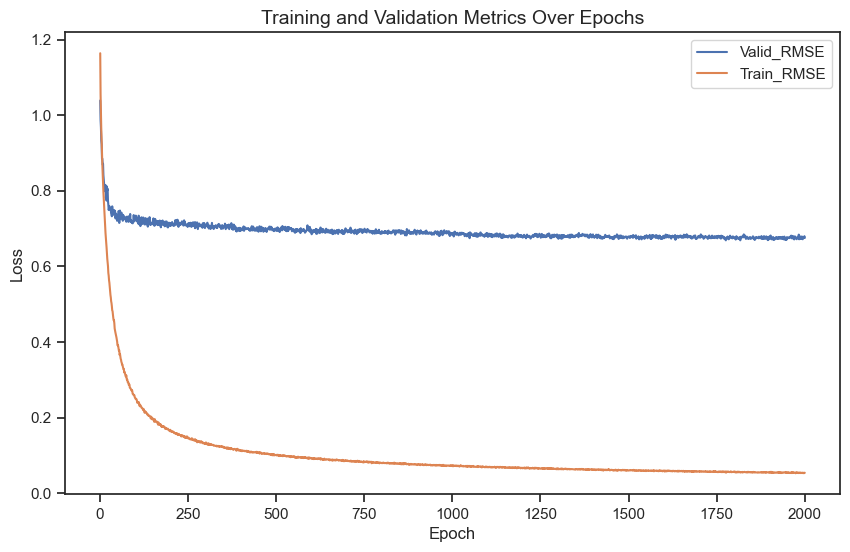

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
# Load metrics

metrics = train_history

# Plot the training loss over epochs using seaborn
plt.figure(figsize=(10, 6))
# sns.lineplot(data=metrics, x='epoch', y='Train Loss', label='Train Loss')
# sns.lineplot(data=metrics, x='epoch', y='Val Loss', label='Val Loss')
sns.lineplot(data=metrics, x='epoch', y='Val MSE', label='Valid_RMSE')
sns.lineplot(data=metrics, x='epoch', y='Train MSE', label='Train_RMSE')
# sns.lineplot(data=metrics, x='Epoch', y='Valid_MAE', label='Valid_MAE')
# Add titles and labels
plt.title('Training and Validation Metrics Over Epochs', fontsize=14)
# Define the range of tick positions
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(False)
# Show the plot
plt.show()


In [12]:
train_history.tail()

,epoch,Train Loss,Train MSE,Train MAE,Train RMSE,Train R2,Train Pearson,Train Median_AE,Train Explained_VARVal Loss,Val MSE,Val MAE,Val RMSE,Val R2,Val Pearson,Val Median_AE,Val Explained_VAR,Train Explained_VAR,Val Loss
1995,1996,0.052670,0.052667,0.174810,0.174810,0.967589,0.983661,0.140034,NaN,0.676258,0.603112,0.603112,0.569329,0.756895,0.453431,0.569440,0.967589,0.676258
1996,1997,0.053748,0.053740,0.175390,0.175390,0.966929,0.983326,0.140685,NaN,0.676109,0.603590,0.603590,0.569425,0.756628,0.451484,0.569564,0.966929,0.676109
1997,1998,0.053484,0.053473,0.175043,0.175043,0.967093,0.983409,0.138513,NaN,0.676864,0.603125,0.603125,0.568944,0.756674,0.450177,0.569177,0.967093,0.676864
1998,1999,0.052791,0.052789,0.173998,0.173998,0.967514,0.983623,0.138835,NaN,0.680059,0.604143,0.604143,0.566909,0.755727,0.445884,0.566948,0.967514,0.680058
1999,2000,0.053765,0.053753,0.175155,0.175155,0.966921,0.983322,0.139318,NaN,0.675381,0.603586,0.603586,0.569888,0.756871,0.451233,0.570915,0.966922,0.675381


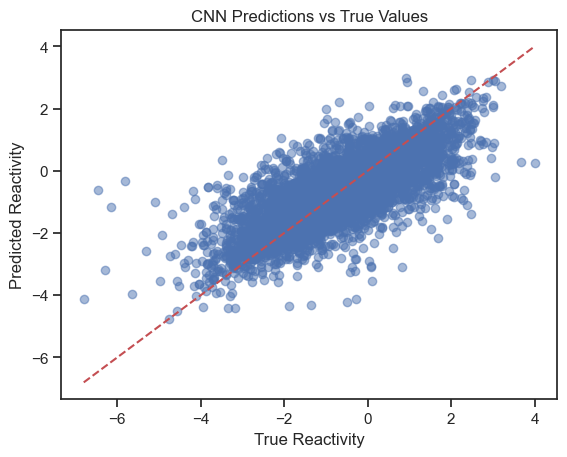

In [13]:
# Plot the performance
import matplotlib.pyplot as plt

plt.scatter(test_labels, test_predictions, alpha=0.5)
plt.xlabel("True Reactivity")
plt.ylabel("Predicted Reactivity")
plt.title("CNN Predictions vs True Values")
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], 'r--')
plt.show()
